🔹 Data Shape: (143366, 48)

🔹 Column Data Types:
Unnamed: 0                    int64
suggestion_dt                object
expid                        object
expid_desc                   object
item_id                      object
pdc                          object
vndr_concat                  object
desk                         object
velocity                     object
part_cost                   float64
spq                         float64
ord_min                       int64
ord_mult                      int64
ord_dollar_min              float64
lead_time                   float64
on_hand                     float64
on_order                    float64
ss_units_left_pct           float64
max_oh_left_pct             float64
days_on_hand                float64
oh_oo_sug_dos               float64
oo_dos                      float64
doh_less_ss                   int64
doh_to_ltm                  float64
oo_it_portion               float64
oh_5d_change                float64
min_on_hand_cha

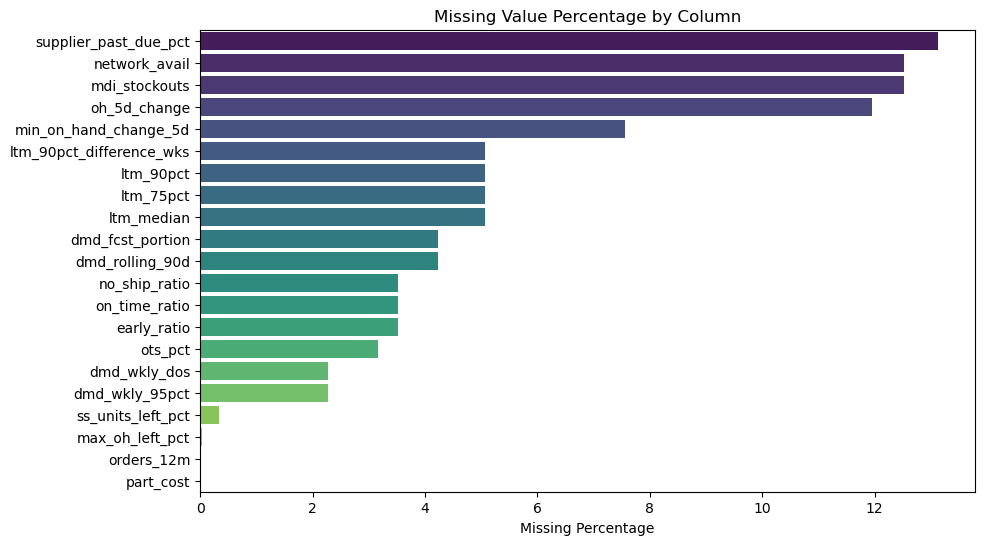


🔹 Summary Statistics:
                             count          mean           std          min  \
Unnamed: 0                143366.0  71682.500000  41386.343684     0.000000   
part_cost                 143365.0    121.009899    347.272602     0.000000   
spq                       143366.0      1.959335      8.000741     1.000000   
ord_min                   143366.0      4.759762     42.869451     0.000000   
ord_mult                  143366.0      4.315849     42.447210     0.000000   
ord_dollar_min            143366.0      0.290857     15.785344     0.000000   
lead_time                 143366.0     43.288757     24.816470     7.000000   
on_hand                   143366.0     21.156020    176.205600 -2100.000000   
on_order                  143366.0     31.840255    263.366554     0.000000   
ss_units_left_pct         142890.0      0.845417      1.701510  -114.132089   
max_oh_left_pct           143330.0      0.566937      1.779209   -71.989529   
days_on_hand              143

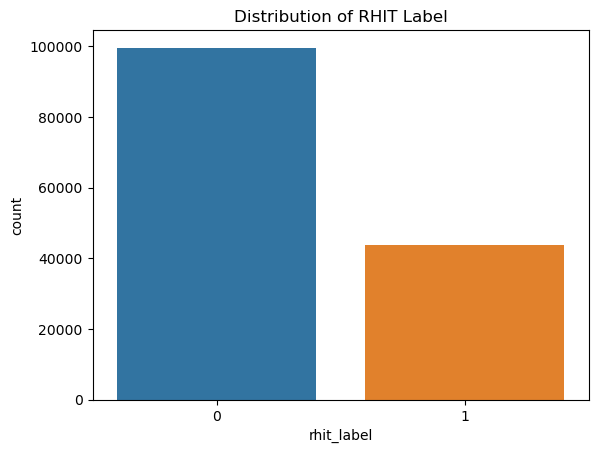

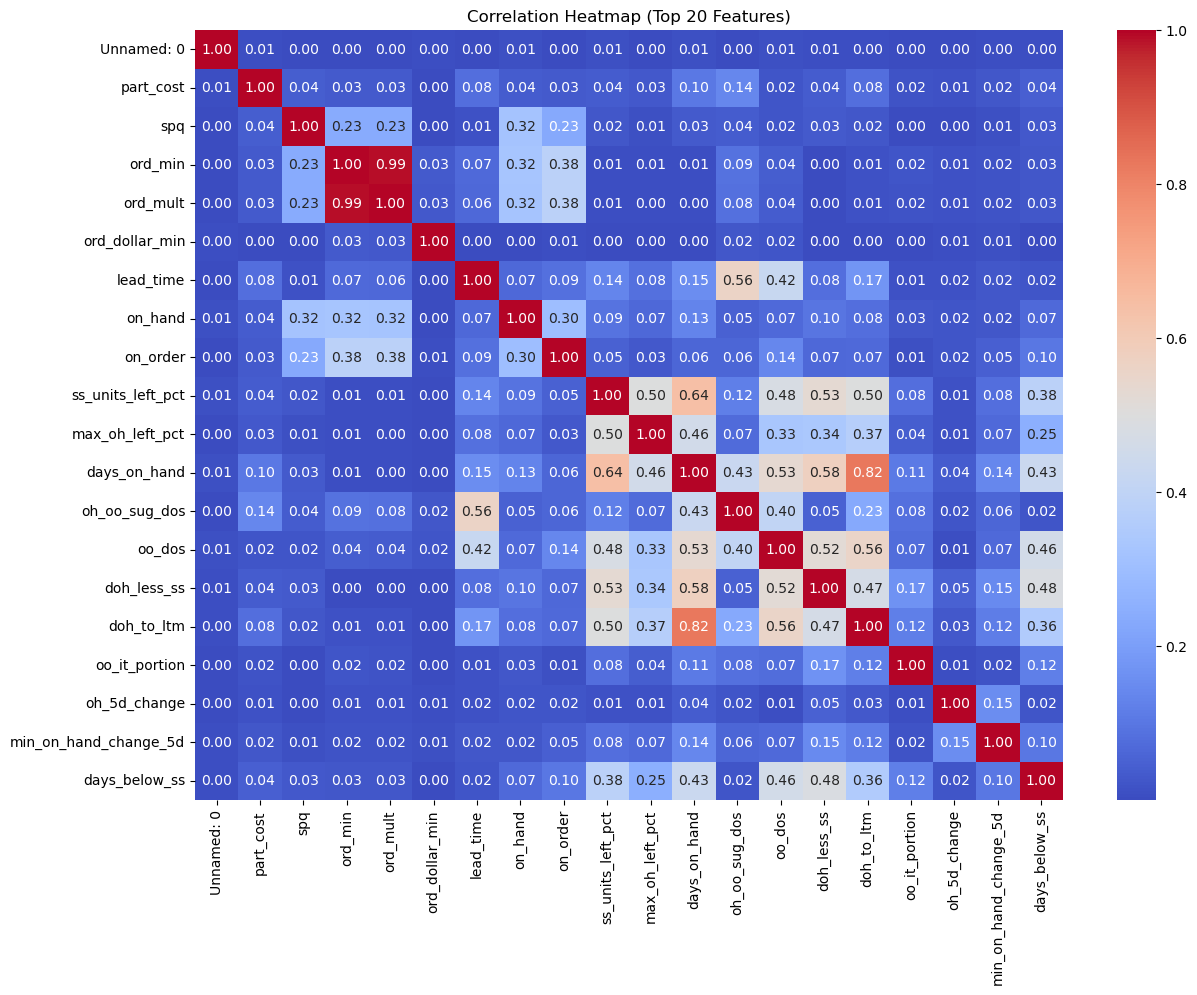

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('test_data.csv')  # Replace with your actual file name

# --- Basic Info ---
print("🔹 Data Shape:", df.shape)
print("\n🔹 Column Data Types:")
print(df.dtypes)

# --- Missing Value Percentage ---
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("🔹 Missing Value Percentage:")
print(missing_percent.round(2))

# --- Visualize Missing % ---
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="viridis")
plt.xlabel("Missing Percentage")
plt.title("Missing Value Percentage by Column")
plt.show()

# --- Summary Statistics (Numeric only) ---
print("\n🔹 Summary Statistics:")
print(df.describe().T)

# --- Check for Duplicates ---
print("\n🔹 Duplicate Rows:", df.duplicated().sum())

# --- Check Target Distribution (if binary classification) ---
if 'rhit_label' in df.columns:
    print("\n🔹 RHIT Label Distribution:")
    print(df['rhit_label'].value_counts(normalize=True))

    # Optional: Bar plot
    sns.countplot(x='rhit_label', data=df)
    plt.title("Distribution of RHIT Label")
    plt.show()

# --- Correlation Heatmap (Top 20 numeric features) ---
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr().abs().iloc[:20, :20], annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Top 20 Features)")
plt.show()
